## Investigation On Intervals and Determine whether it's meal

In [1]:
import meals as ml
import tools as tl
import paths

In [2]:
flip_ctrl_meal_count = []
for path in paths.contigency_flip_ctrl:
    test = ml.process_csv(path)
    avg = round(len(ml.find_meals(test)) / ml.experiment_duration(test), 2)
    flip_ctrl_meal_count.append(avg)
flip_ctrl_meal_count

[18.47, 20.14, 20.68, 21.2, 18.23, 25.04]

In [3]:
flip_cask_meal_count = []
for path in paths.contigency_flip_cask:
    test = ml.process_csv(path)
    avg = round(len(ml.find_meals(test)) / ml.experiment_duration(test), 2)
    flip_cask_meal_count.append(avg)
flip_cask_meal_count

[21.82, 23.29, 18.65, 31.19, 37.4, 30.56, 23.74, 24.75, 24.38]

### Control Group

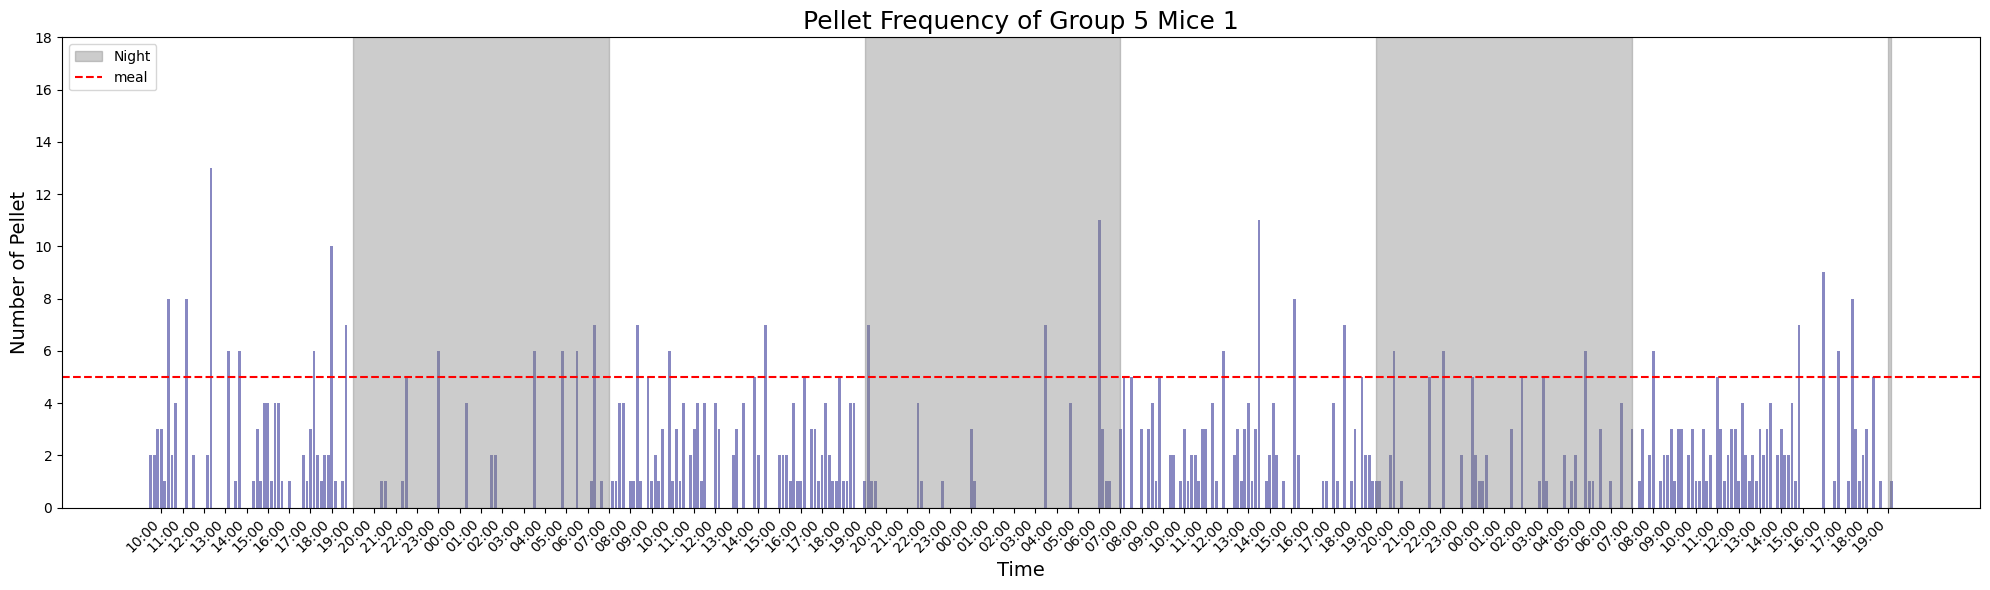

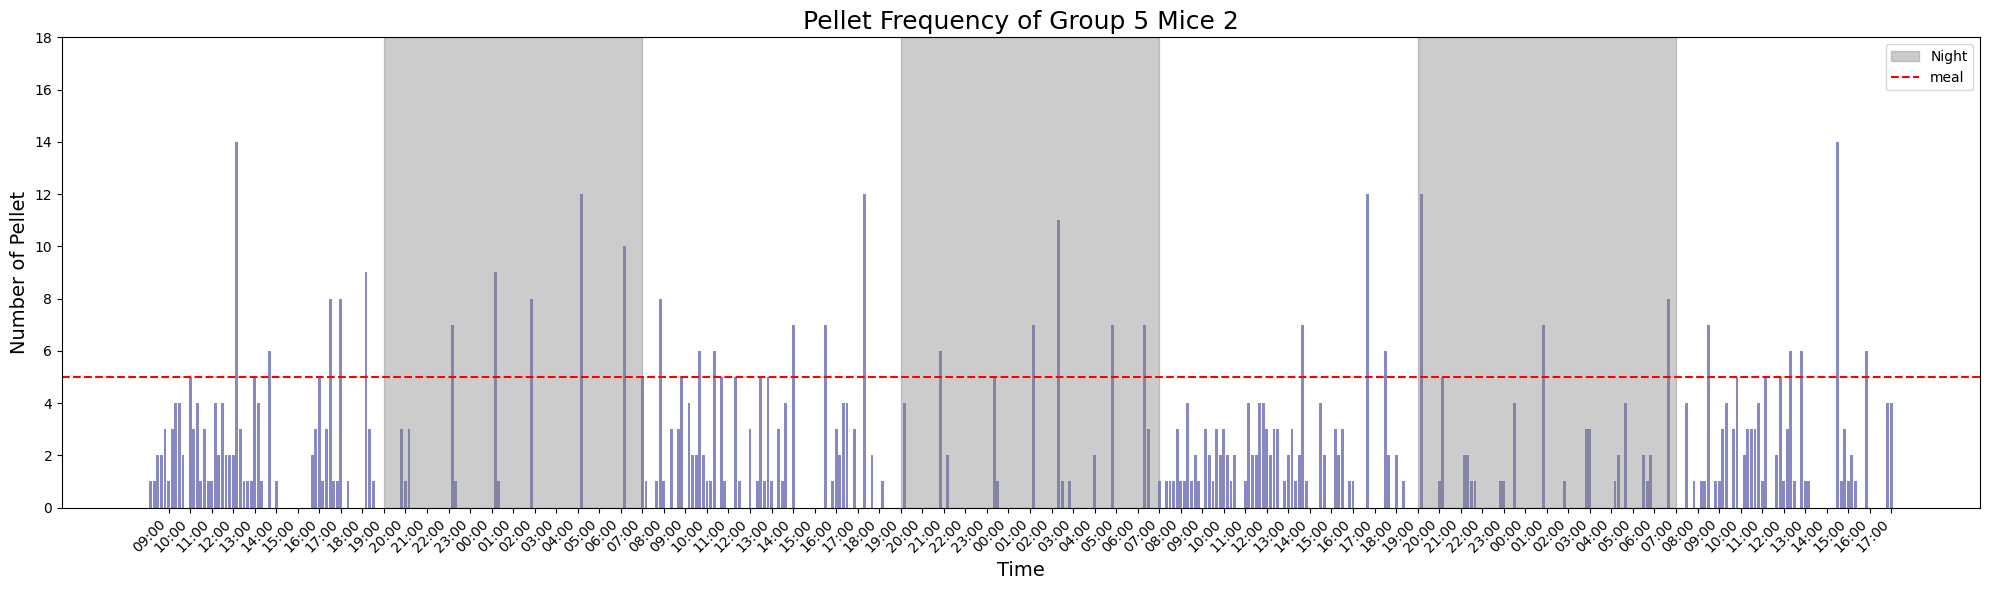

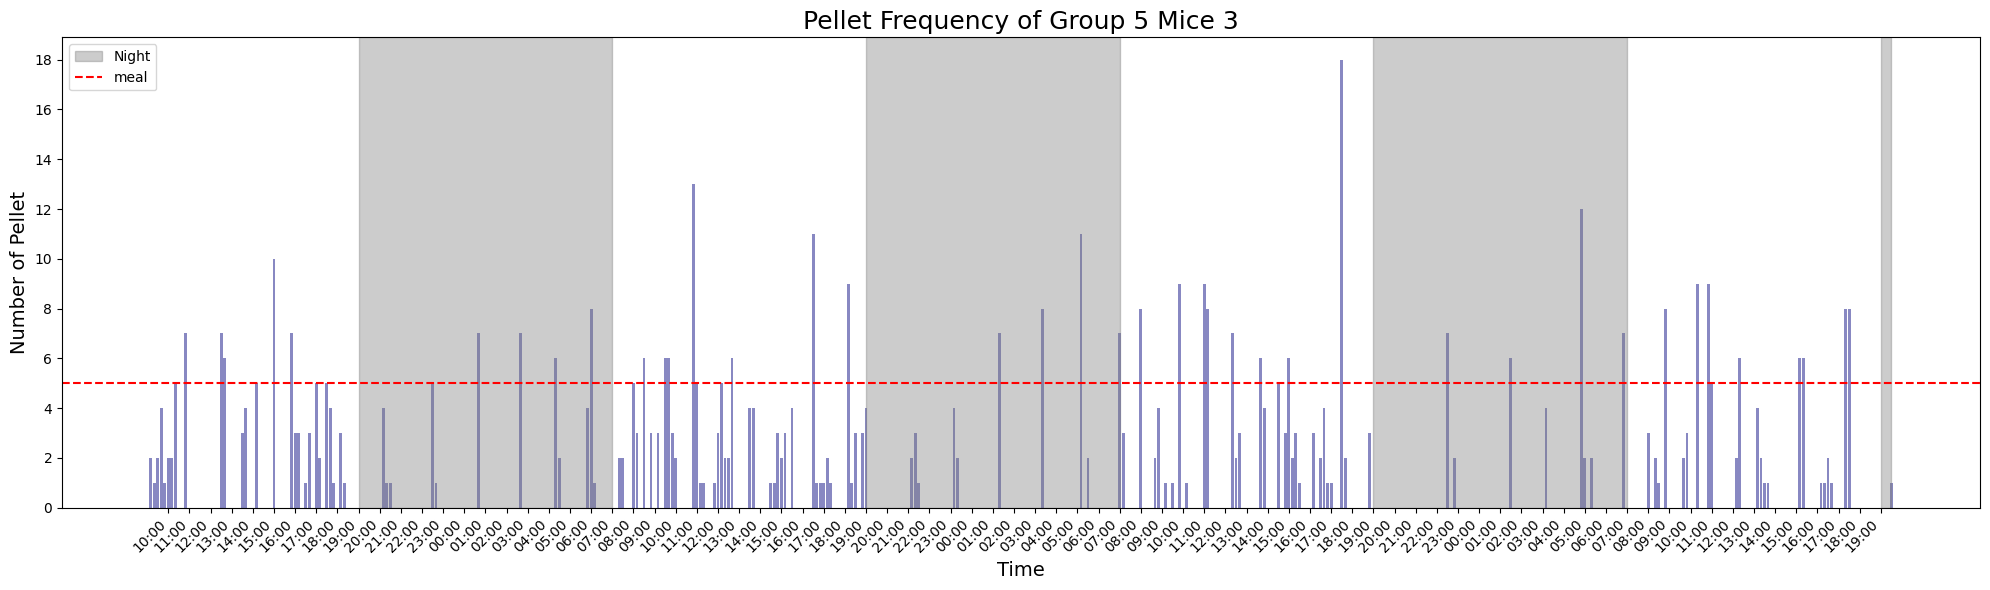

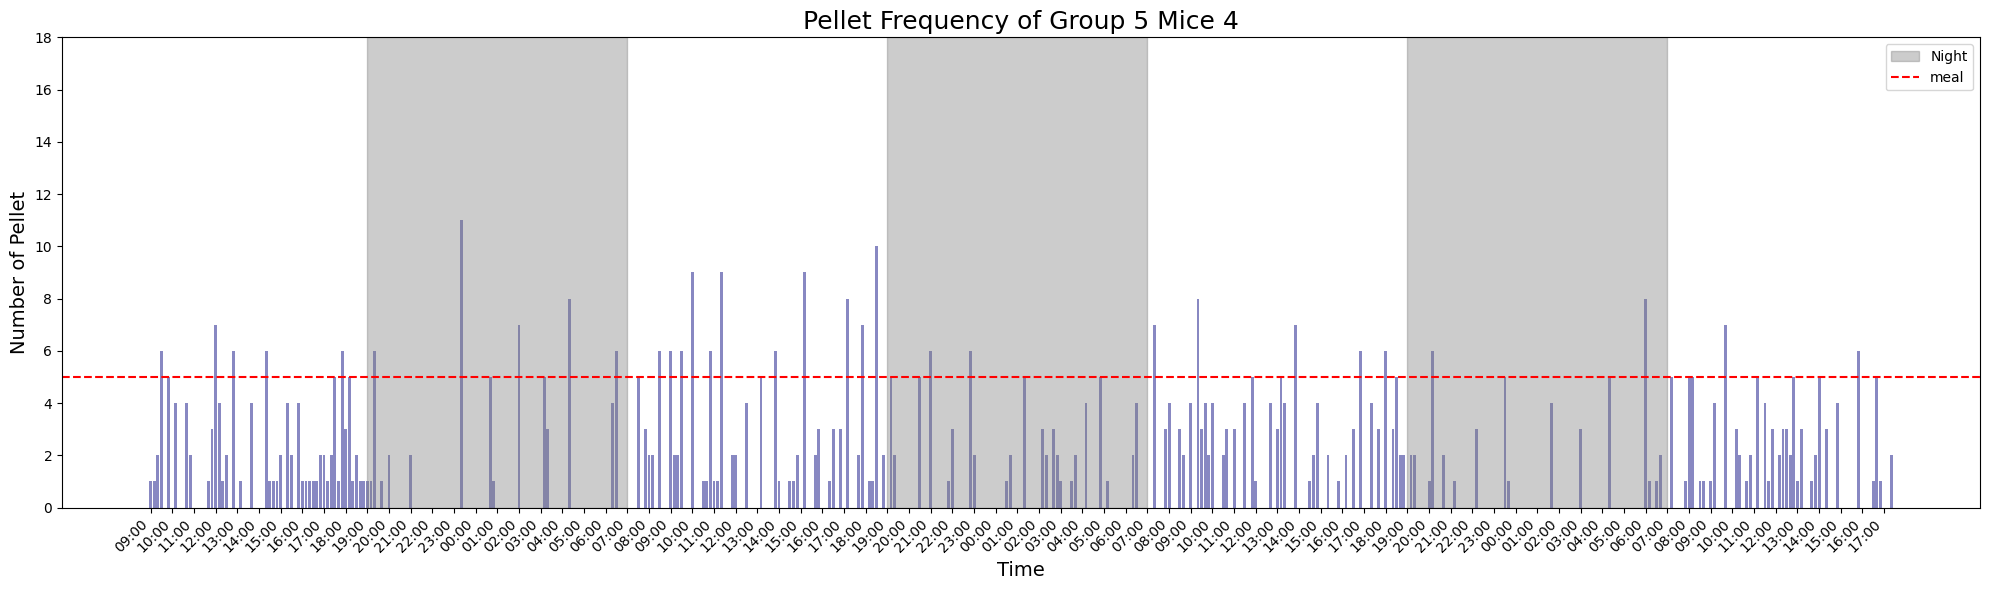

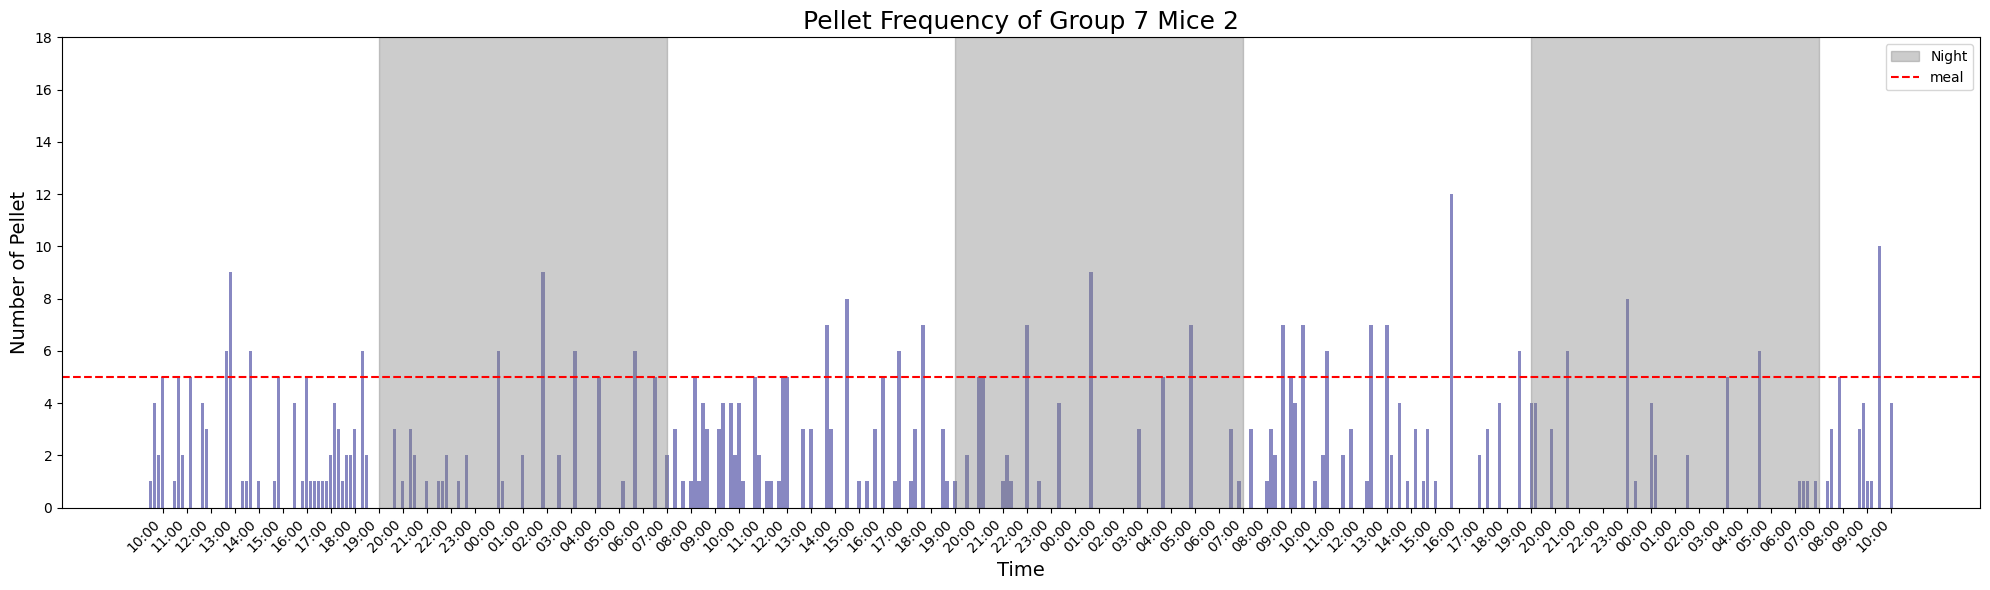

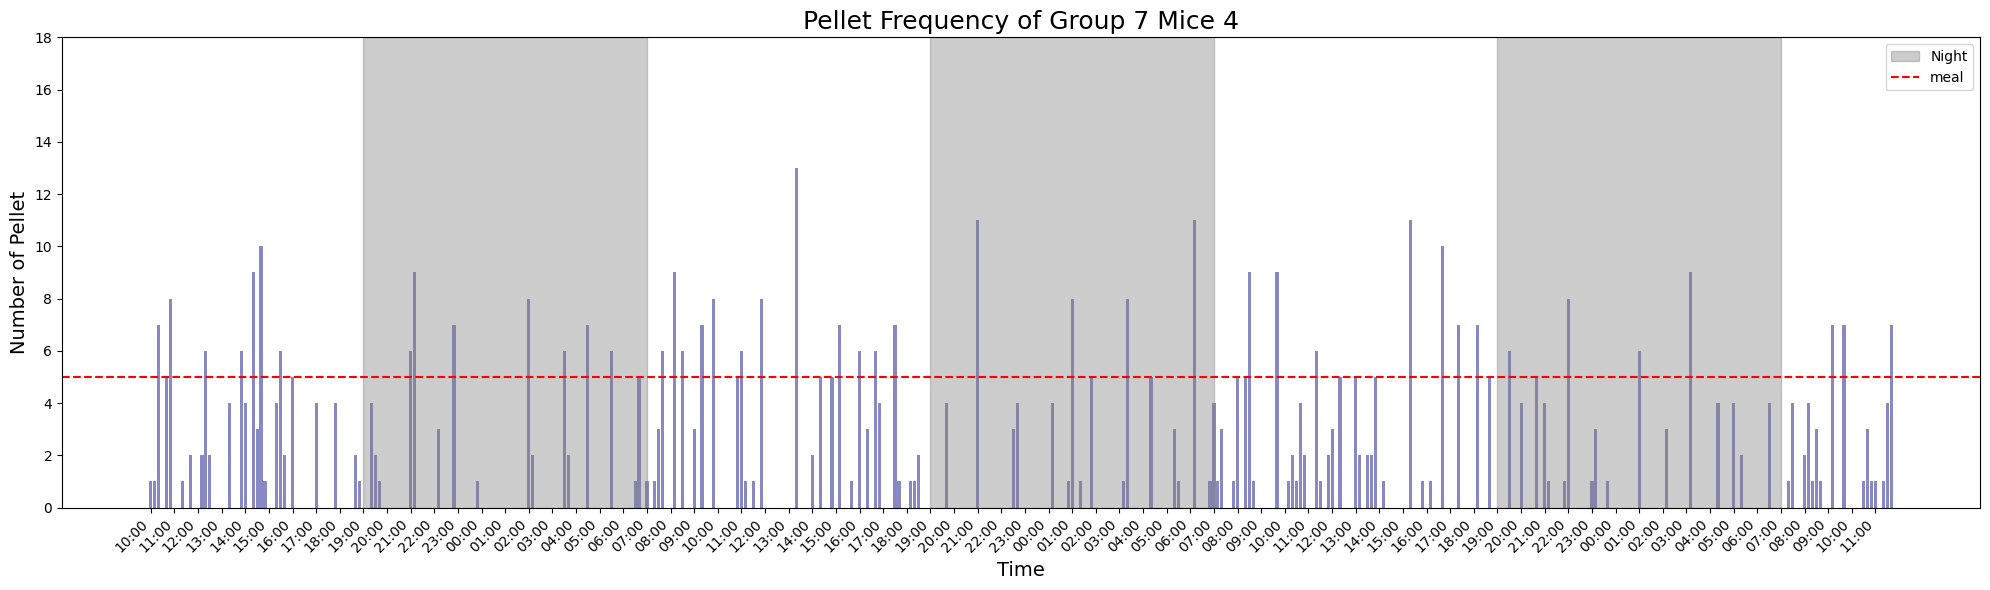

In [4]:
ctrl_avg_interval = []
ctrl_deviation = []
ctrl_meal_proportion_dark = []
for path in paths.contigency_flip_ctrl:
    data = ml.process_csv(path)
    group = ml.pellet_flip(data)
    bhv, num = tl.get_bhv_num(path)
    ctrl_avg_interval.append(ml.average_pellet(group))
    ctrl_deviation.append(ml.calculate_deviation(group))
    ctrl_meal_proportion_dark.append(ml.pellet_dark(group))
    ml.graph_pellet_frequency(group, bhv, num)

### Cask Group

In [8]:
path = paths.contigency_flip_cask[0]
data = ml.process_csv(path)
group = ml.pellet_flip(data)
group.head(10)

,Interval_Start,Pellet_Count
0,2023-07-11 09:00:00,1
1,2023-07-11 09:10:00,4
2,2023-07-11 09:20:00,1
3,2023-07-11 09:30:00,4
4,2023-07-11 09:40:00,0
5,2023-07-11 09:50:00,3
6,2023-07-11 10:00:00,4
7,2023-07-11 10:10:00,0
8,2023-07-11 10:20:00,6
9,2023-07-11 10:30:00,1


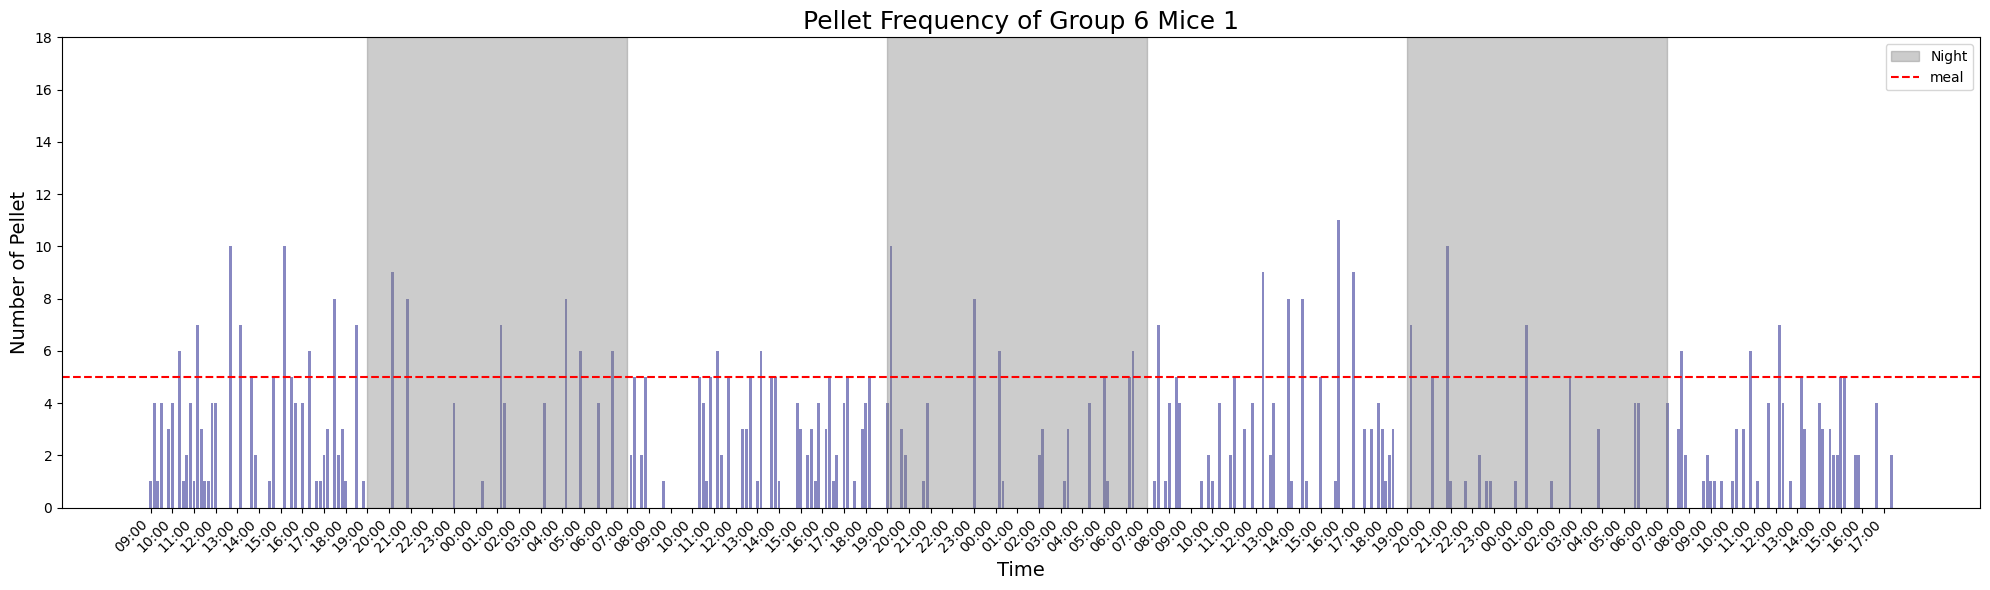

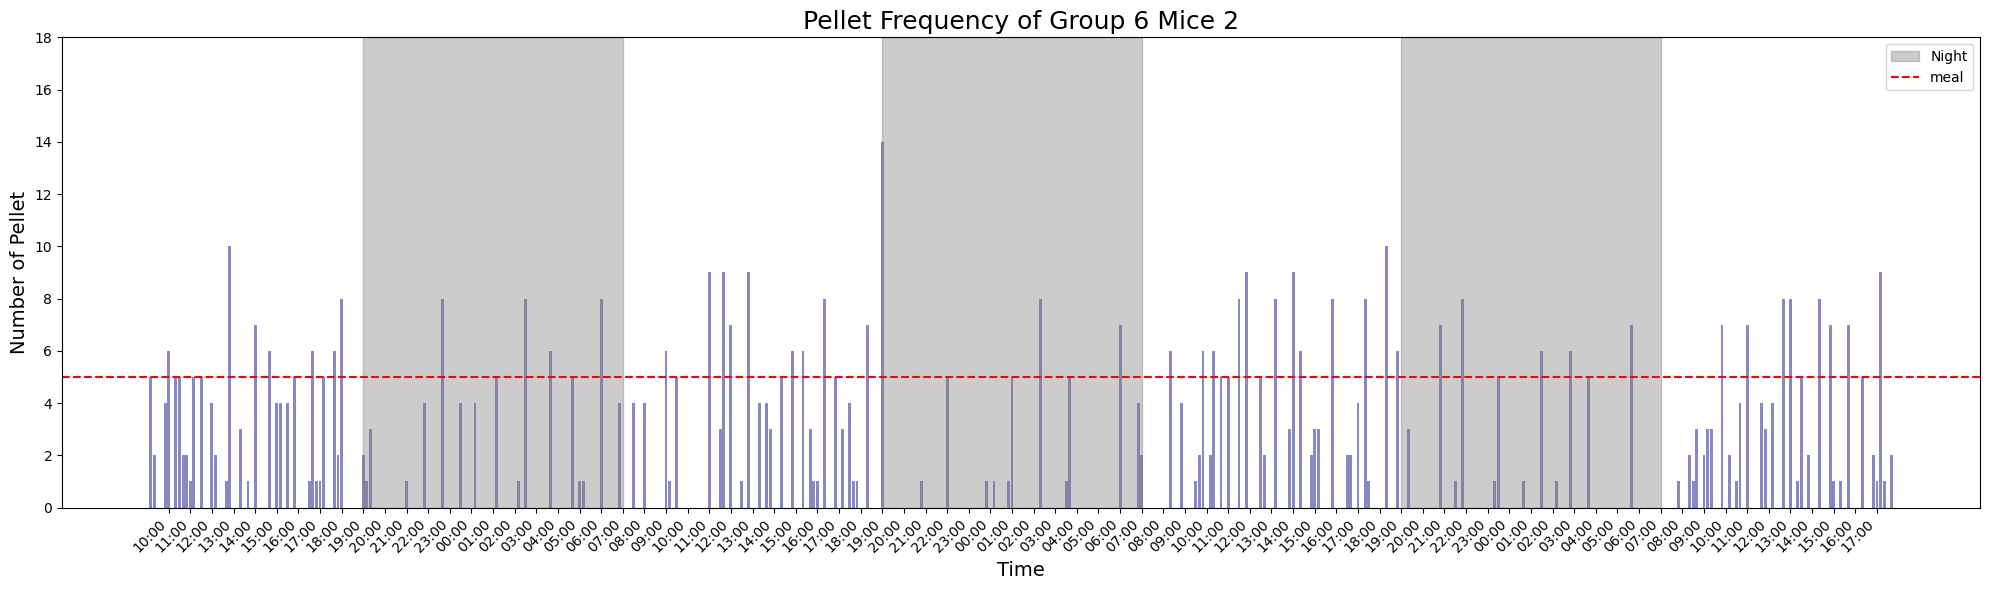

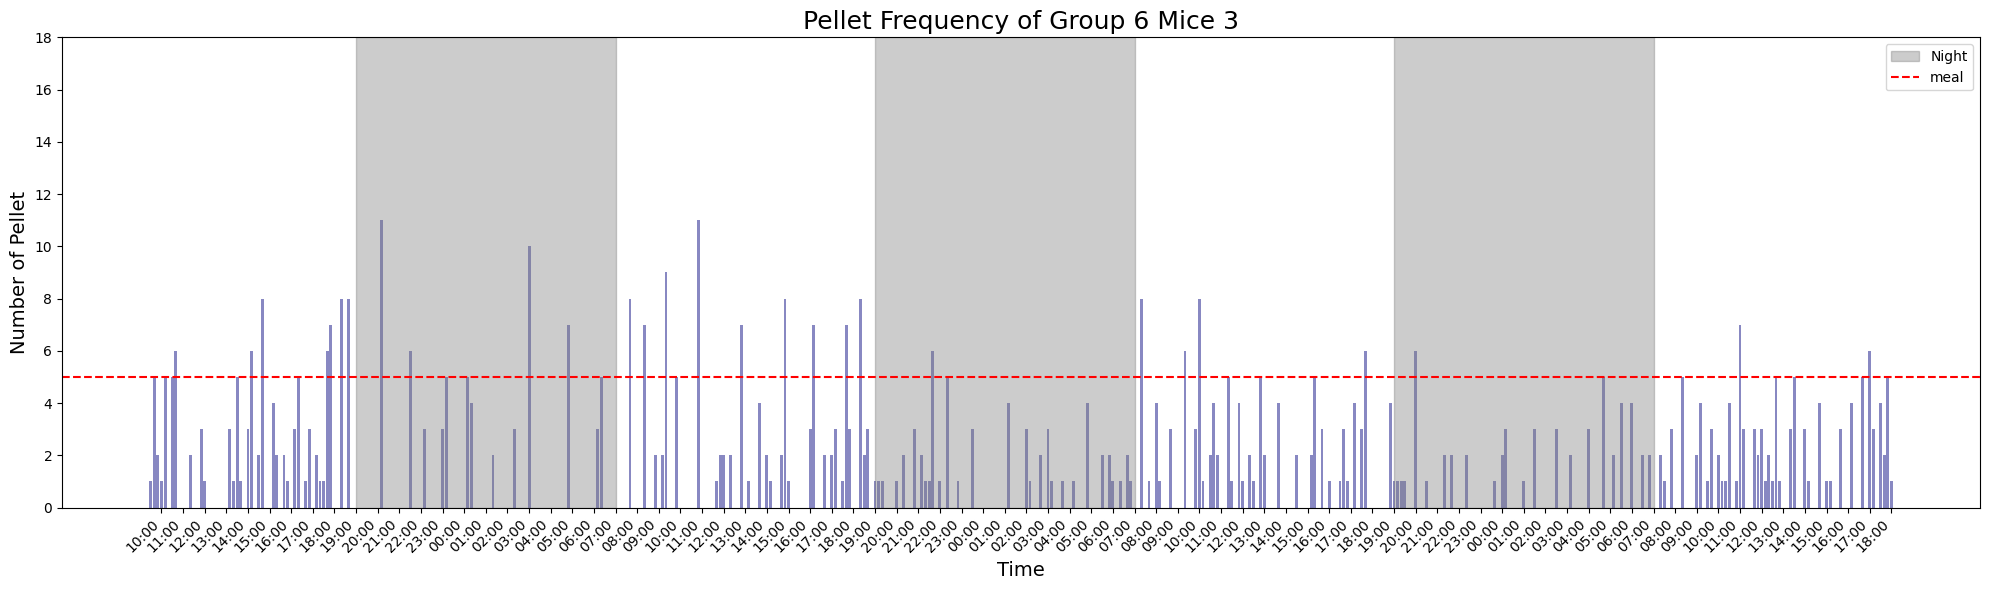

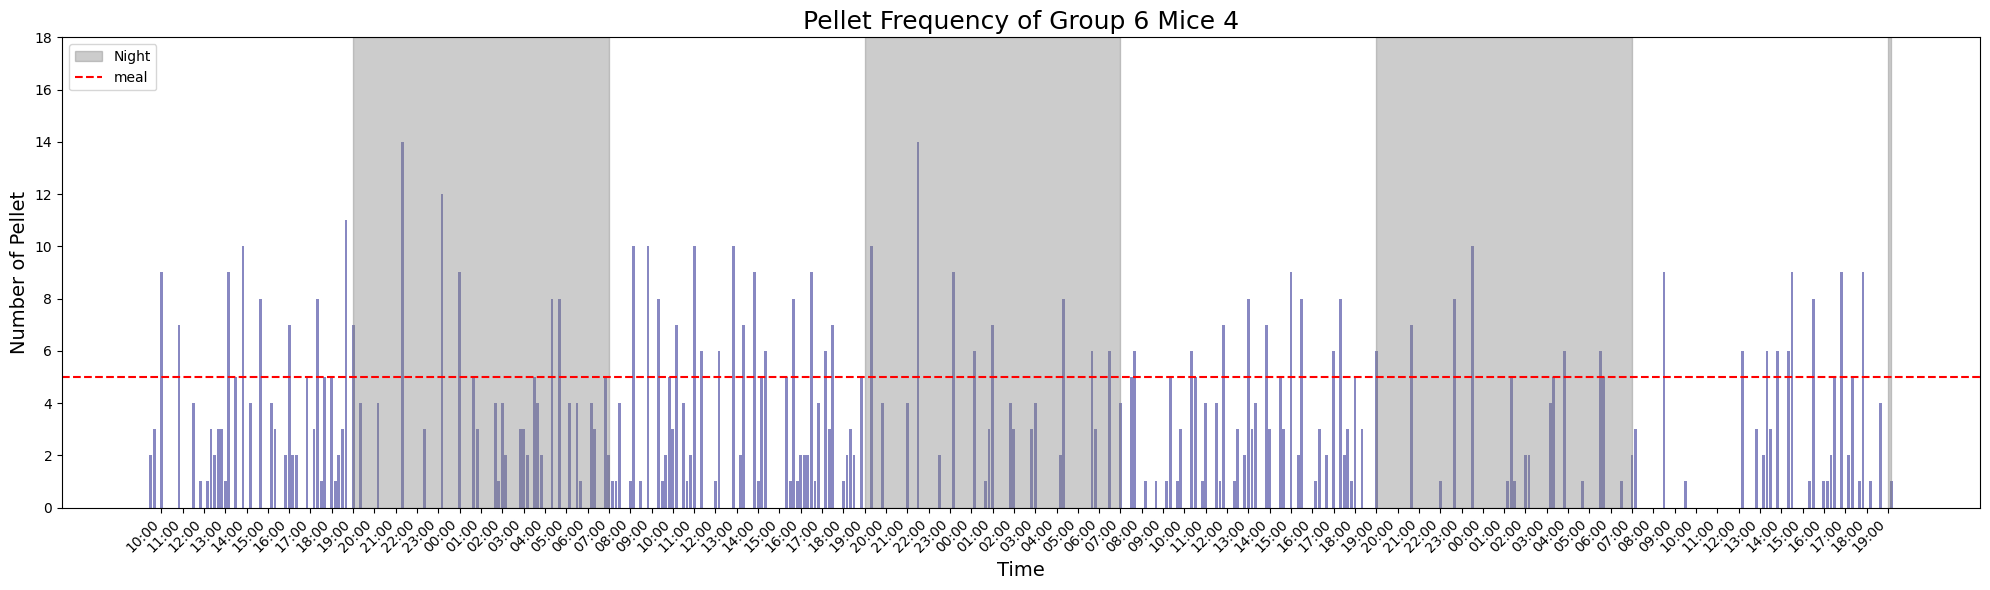

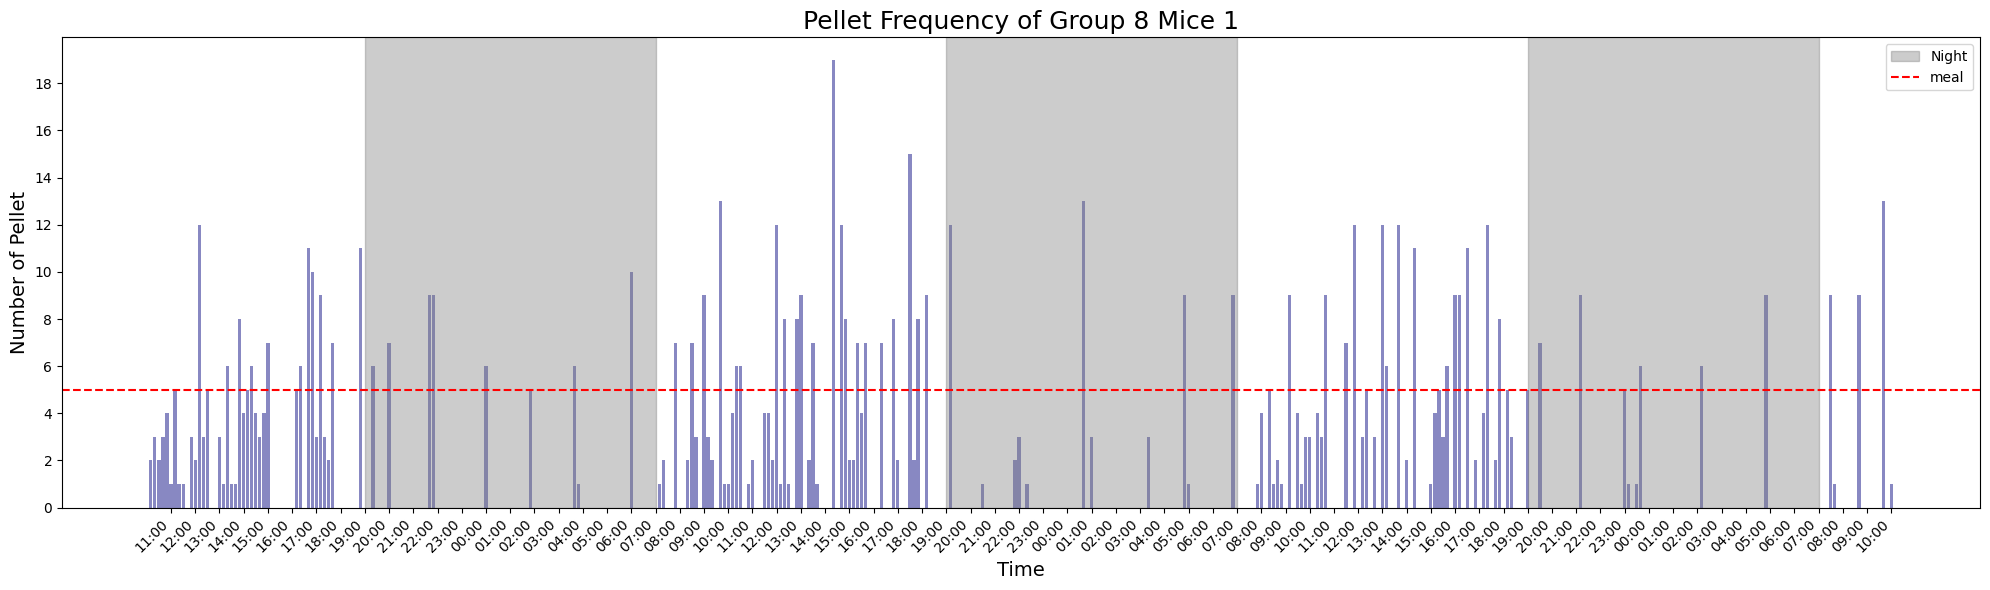

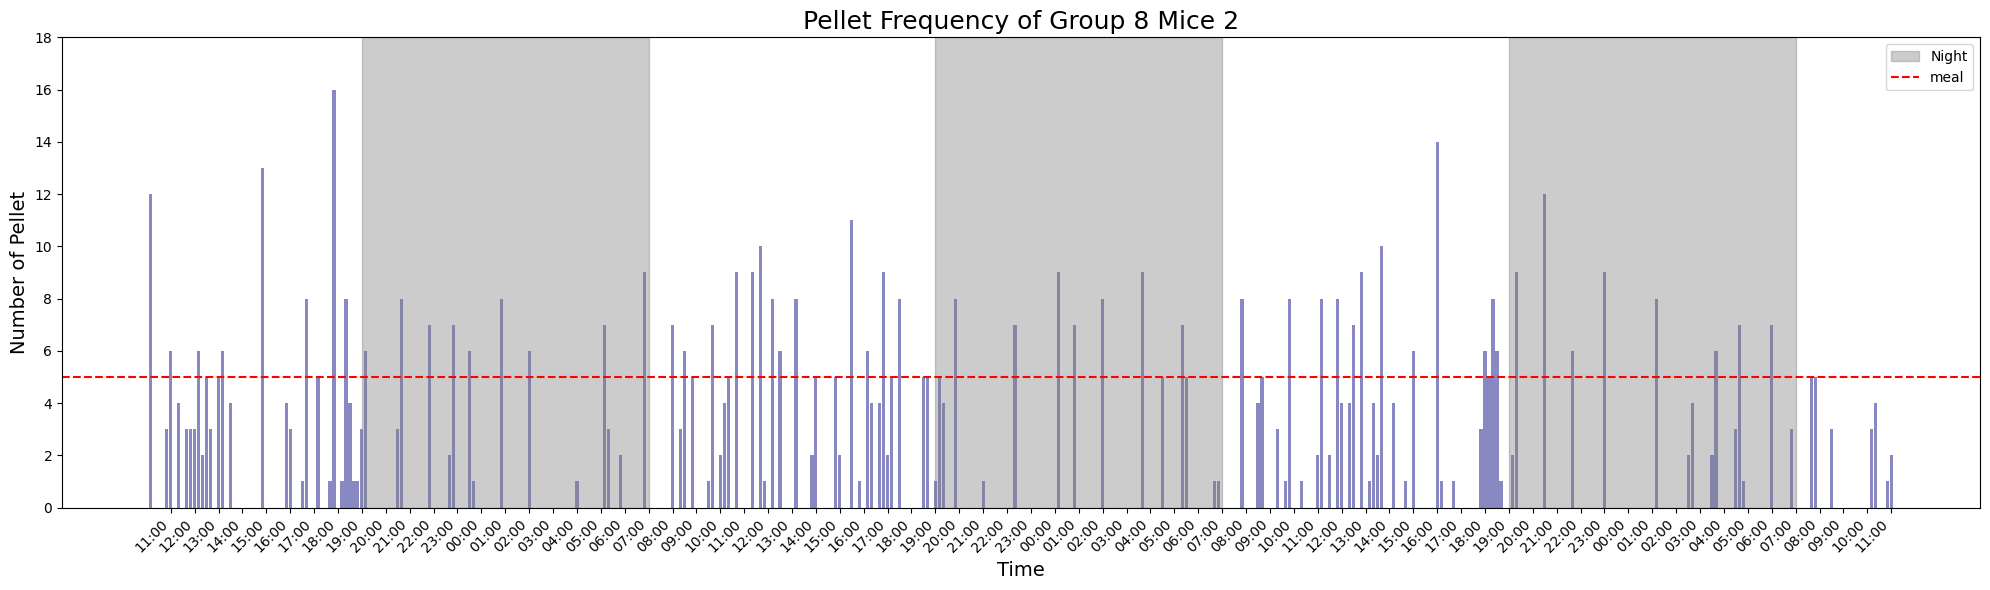

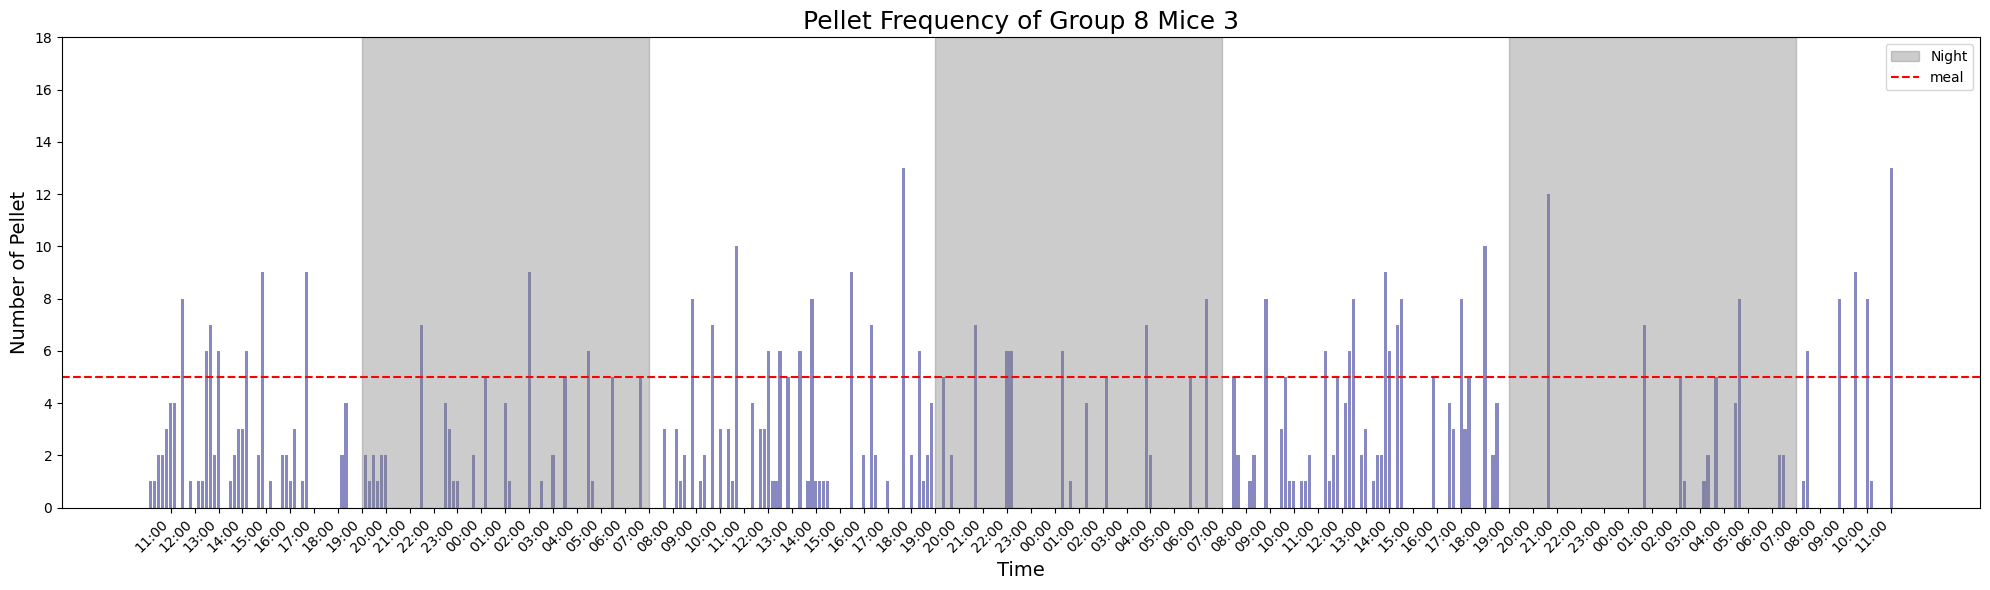

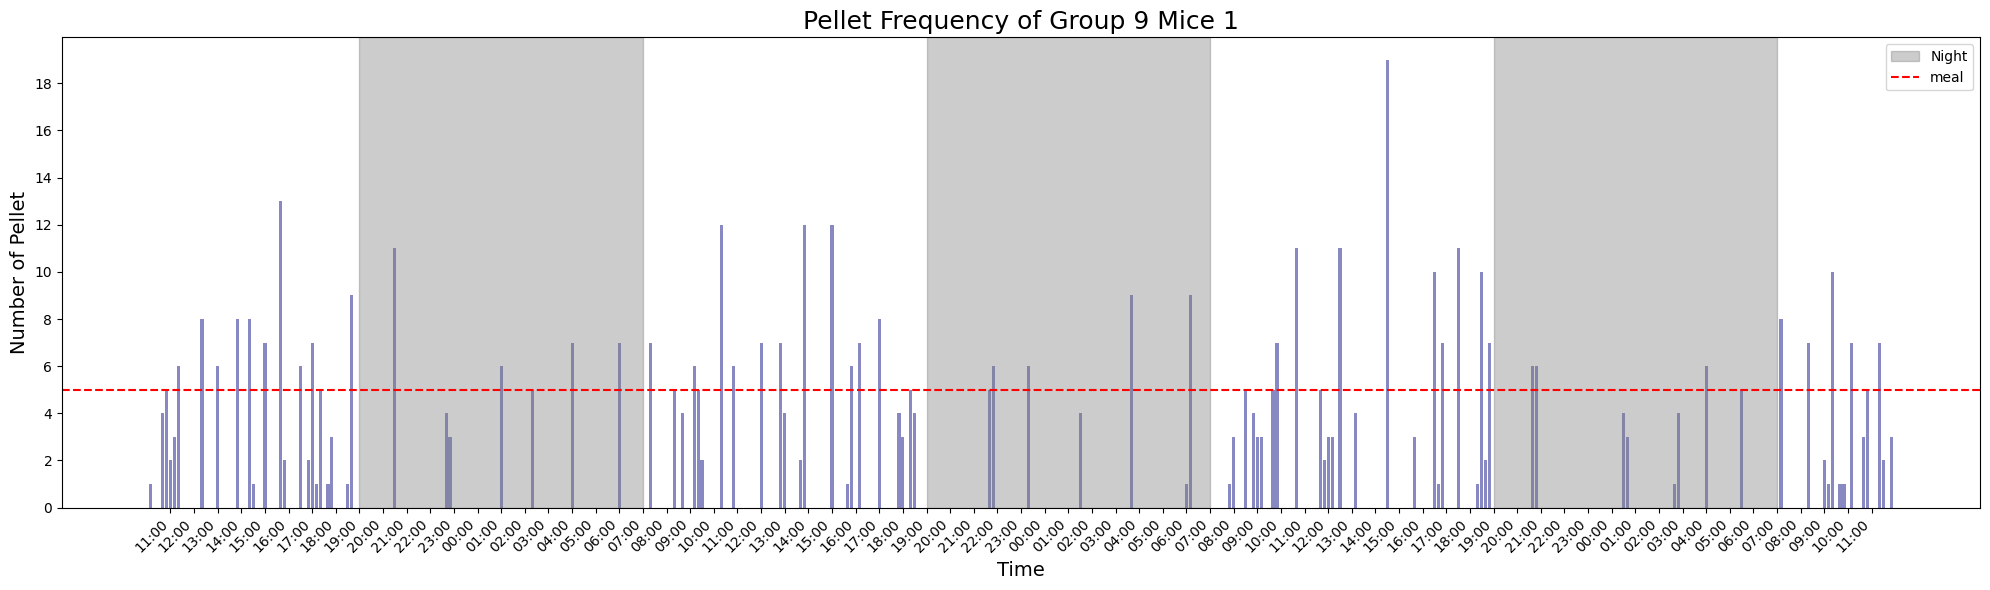

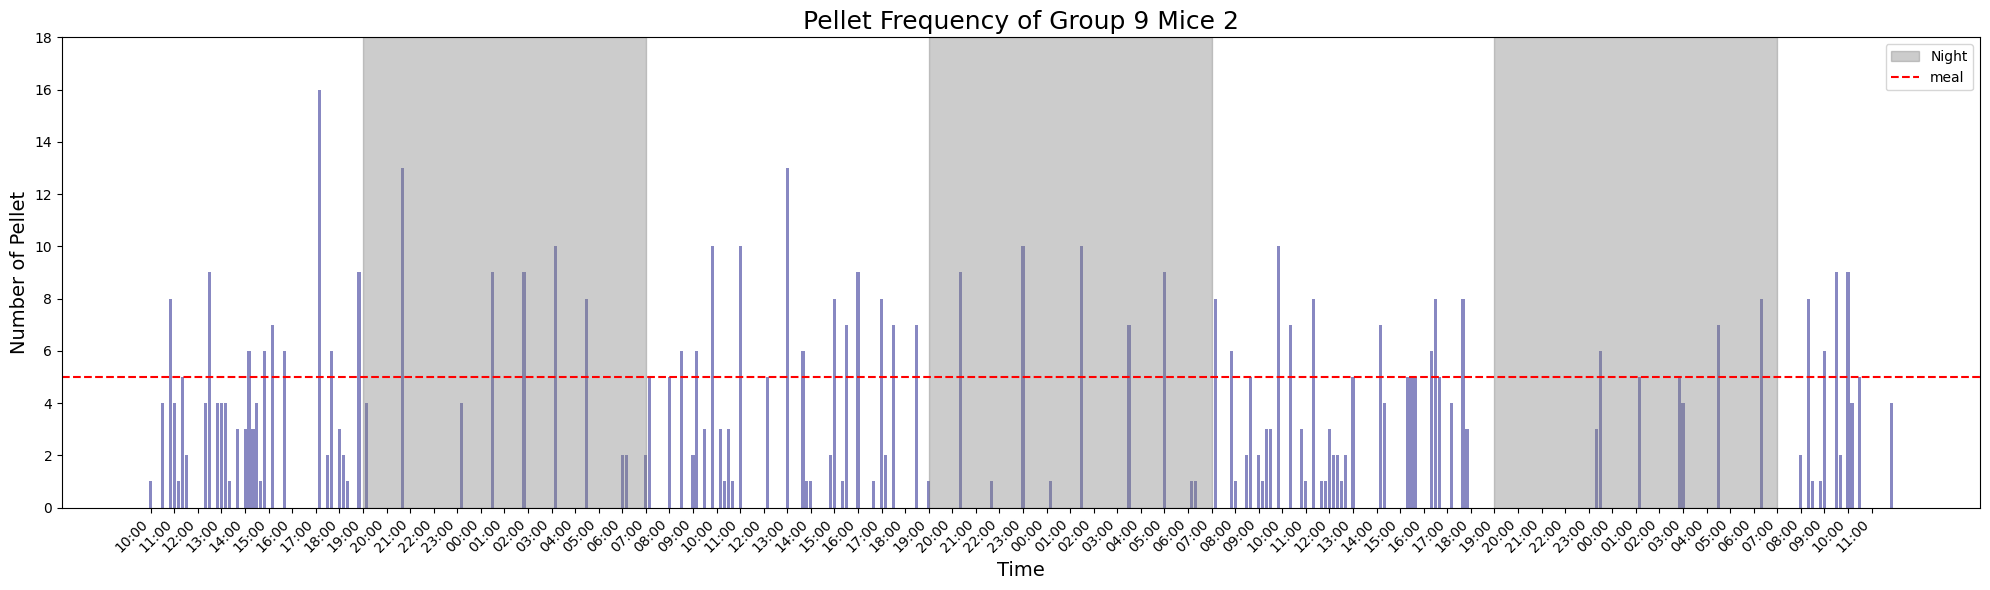

In [5]:
cask_avg_interval = []
cask_deviation = []
cask_meal_proportion_dark = []
for path in paths.contigency_flip_cask:
    data = ml.process_csv(path)
    group = ml.pellet_flip(data)
    bhv, num = tl.get_bhv_num(path)
    cask_avg_interval.append(ml.average_pellet(group))
    cask_deviation.append(ml.calculate_deviation(group))
    cask_meal_proportion_dark.append(ml.pellet_dark(group))
    ml.graph_pellet_frequency(group, bhv, num)

### Pellet Interval Analysis

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import intervals as invs

alpha = 0.1

In [4]:
print(ctrl_meal_proportion_dark)
print(cask_meal_proportion_dark)

[0.232, 0.205, 0.207, 0.262, 0.319, 0.325]
[0.243, 0.258, 0.325, 0.309, 0.188, 0.324, 0.294, 0.21, 0.205]


In [8]:
invs.perform_T_test(ctrl_meal_proportion_dark, cask_meal_proportion_dark)

P Value is  0.9045840875692468
There is no significant difference between the two groups.


In [4]:
print(ctrl_deviation)
print(cask_deviation)

[4.621181262729125, 7.537037037037037, 7.2727272727272725, 6.316770186335404, 5.717889908256881, 8.20316027088036]
[7.01656314699793, 8.090909090909092, 6.010330578512397, 11.116089613034623, 14.835648148148149, 11.073059360730594, 8.397260273972602, 9.187358916478555, 9.245495495495495]


In [7]:
invs.perform_T_test(ctrl_deviation, cask_deviation)

P Value is  0.03080532959232514
There is a significant difference between the two groups.


$$Deviation = \frac{1}{n} \ \sum_{i=1}^n \ |x_i - \overline{X}| $$


In [8]:
invs.MannWhitneyUTest(ctrl_deviation, cask_deviation)

U Statistic: 8.0
P-value: 0.025574425574425574
There is a significant difference between the two groups.


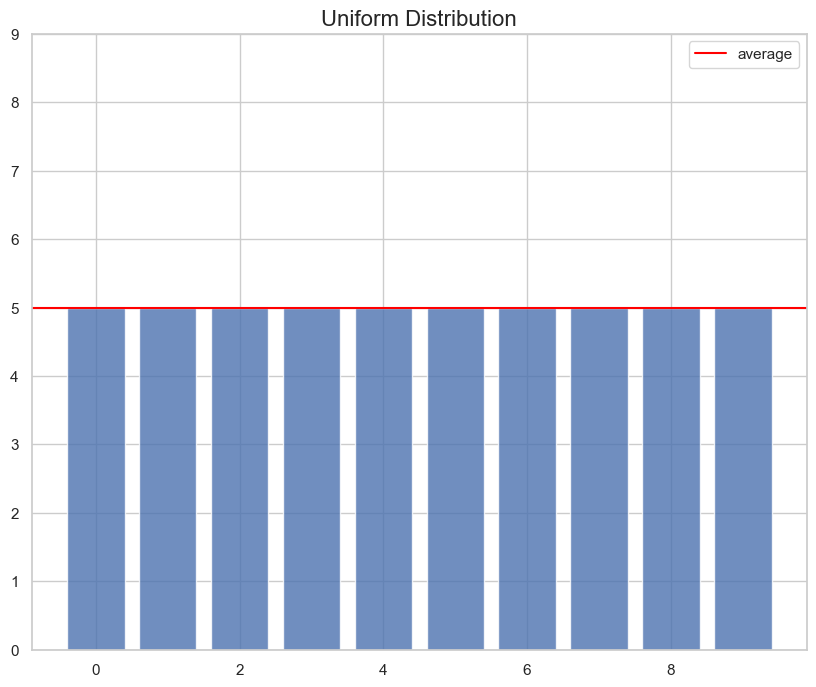

In [18]:
plt.figure(figsize=(10, 8))
plt.bar(x=range(10), height=5, alpha=0.8)
plt.yticks(range(10))
plt.axhline(y=5, color='red', label='average')
plt.title('Uniform Distribution', fontsize=16)
plt.legend()
plt.show()

/var/folders/kk/3lqkkjzx7kb59yj16vgzwnyh0000gn/T/ipykernel_42680/994941315.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Group", y="Value", data=data, palette="pastel",
/var/folders/kk/3lqkkjzx7kb59yj16vgzwnyh0000gn/T/ipykernel_42680/994941315.py:17: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': '0.4'}` instead.

  ax = sns.barplot(x="Group", y="Value", data=data, palette="pastel",


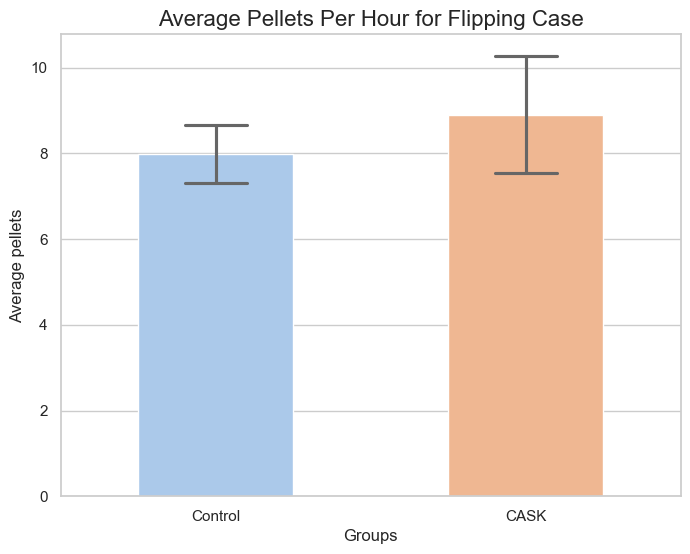

In [11]:
average = [
    np.mean(ctrl_avg_interval),
    np.mean(cask_avg_interval)
]

# Create DataFrames for each group
data_ctrl = pd.DataFrame({'Group': 'Control', 'Value': ctrl_avg_interval})
data_cask = pd.DataFrame({'Group': 'CASK', 'Value': cask_avg_interval})

# Concatenate the two DataFrames
data = pd.concat([data_ctrl, data_cask])

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Create the bar plot with error bars
ax = sns.barplot(x="Group", y="Value", data=data, palette="pastel",
                 errorbar="sd", capsize=0.2, width=0.5, errcolor='0.4')

plt.title('Average Pellets Per Hour for Flipping Case', fontsize=16)
plt.xlabel('Groups')
plt.ylabel('Average pellets')
plt.show()


In [13]:
cask_avg_interval

[8.203, 8.273, 7.739, 10.776, 11.318, 9.666, 8.513, 7.52, 8.14]

In [14]:
invs.perform_T_test(ctrl_avg_interval, cask_avg_interval, 0.1)

P Value is  0.1532432859856271
There is no significant difference between the two groups.


### Control Flip

In [15]:
ctrl_flip_avg = []
for path in paths.contigency_flip_ctrl:
    data = ml.process_csv(path)
    interval = invs.count_interval(data)
    avg = np.sum(interval) / len(interval)
    ctrl_flip_avg.append(avg)

### CASK Flip

In [16]:
cask_flip_avg = []
for path in paths.contigency_flip_cask:
    data = ml.process_csv(path)
    interval = invs.count_interval(data)
    avg = np.sum(interval) / len(interval)
    cask_flip_avg.append(avg)

##### Control flip && cask flip

In [17]:
invs.perform_T_test(ctrl_flip_avg, cask_flip_avg, 0.1)

P Value is  0.10600696788923787
There is no significant difference between the two groups.


## Interval Investigation for FR1 Group

In [18]:
path = '../behavior data integrated/Adjusted FED3 Data.xlsx'

#### Control FR1

In [19]:
ctrl_fr1_interval = []

for sheet in paths.fr1_ctrl_sheet:
    data = ml.process_sheet(path, sheet=sheet)
    interval = invs.count_interval(data)
    avg = np.sum(interval) / len(interval)
    ctrl_fr1_interval.append(avg)

##### Control FR1 && Control Flip

In [20]:
invs.perform_T_test(ctrl_fr1_interval, ctrl_flip_avg, 0.1)

P Value is  0.49460560904152995
There is no significant difference between the two groups.


### Cask FR1

In [21]:
cask_fr1_interval = []

for path in paths.fr1_cask_csvs:
    data = ml.process_csv(path)
    interval = invs.count_interval(data)
    avg = np.sum(interval) / len(interval)
    cask_fr1_interval.append(avg)

##### FR1 control && FR1 Cask

In [22]:
invs.perform_T_test(cask_fr1_interval, ctrl_fr1_interval)

P Value is  0.4169114469111278
There is no significant difference between the two groups.


CASK flip and fr1

In [23]:
invs.perform_T_test(cask_flip_avg, cask_fr1_interval)

P Value is  0.064951807030107
There is no significant difference between the two groups.


Control flip and fr1

In [24]:
invs.perform_T_test(ctrl_fr1_interval, ctrl_flip_avg)

P Value is  0.49460560904152995
There is no significant difference between the two groups.


* Average Interval also matches the FR1 case that experimental group has larger variance in average intervals.
* no significance difference between all average intervals